# CIFAR10 Multi-Class Image Classification

- Keras notes https://keras.io/api/datasets/cifar10/
- CIFAR detail https://www.cs.toronto.edu/~kriz/cifar.html

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [26]:
# Already pre-processed vectorized, already split data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
# Model parameters
num_classes = 10
input_shape = (32, 32, 3, 1)

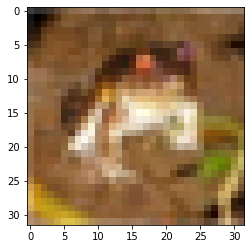

Train label: [6]


In [29]:
digit = x_train[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", y_train[0])

In [30]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [31]:
# Make sure images have shape (32, 32, 3, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3, 1)
50000 train samples
10000 test samples


In [32]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [33]:
# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

ValueError: Input 0 of layer conv2d_4 is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: [None, 32, 32, 3, 1]

In [34]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

ValueError: Error when checking input: expected input_2 to have 4 dimensions, but got array with shape (50000, 32, 32, 3, 1)